# Autoencoder on Iris Dataset 
* Source : https://www.kaggle.com/shivam1600/autoencoder-on-iris-dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Importing Data
!rm iris0.csv
![ ! -f iris0.csv ]&&wget https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/iris0.csv



--2024-06-11 09:26:35--  https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/iris0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/plain]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2024-06-11 09:26:35 (42.7 MB/s) - ‘iris0.csv’ saved [3730/3730]



In [9]:
data = pd.read_csv("iris0.csv")
data.head()
x_train, x_test, y_train, y_test = train_test_split(data[['Sepal.Length', 'Sepal.Width',
                                                          'Petal.Length', 'Petal.Width']],
                                                    data['Species'],test_size=0.1, random_state=1)

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# this is the size of our encoded representations
encoding_dim1 = 6
encoding_dim2 = 4
encoding_dim3 = 2
input_dim = 4

# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim3,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

# Use learning_rate instead of lr
opt = RMSprop(learning_rate=0.001)
autoencoder.compile(loss='mean_squared_error', optimizer=opt)

autoencoder.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.fit(x_train, x_train,
                epochs=333,
                batch_size=123,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks=[])

# encode and decode some data points
# note that we take them from the *test* set
encoded_datapoints = encoder.predict(x_test)
decoded_datapoints = decoder.predict(encoded_datapoints)

print('Original Datapoints :')
print(x_test)
print('Reconstructed Datapoints :')
print(decoded_datapoints)

Epoch 1/333


I0000 00:00:1718101246.100010    2152 service.cc:145] XLA service 0x7f7c28005ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718101246.100038    2152 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-06-11 10:20:46.116542: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-11 10:20:46.218133: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.6602

I0000 00:00:1718101246.792305    2152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 897ms/step - loss: 12.6314 - val_loss: 13.6442
Epoch 2/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5582 - val_loss: 13.6226
Epoch 3/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.5450 - val_loss: 13.6053
Epoch 4/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.5120 - val_loss: 13.5908
Epoch 5/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.4437 - val_loss: 13.5777
Epoch 6/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5708 - val_loss: 13.5669
Epoch 7/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.4499 - val_loss: 13.5560
Epoch 8/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.5254 - val_loss: 13.5459
Epoch 9/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.4771 - val_loss: 13.5359
Epoch 10/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5153 - val_loss: 13.5266
Epoch 11/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5196 - val_loss: 13.5173
Epoch 12/333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.4

# Plotting Encoded Features

In [14]:
encoded_dataset = encoder.predict(x_test[['Sepal.Length', 'Sepal.Width',
                                        'Petal.Length', 'Petal.Width']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


## Encode Dataset

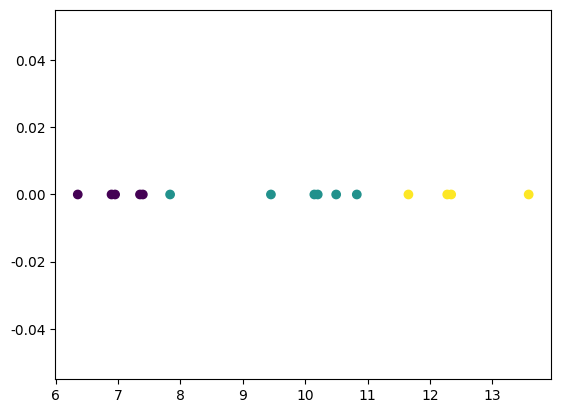

In [15]:
plt.rc('axes', unicode_minus=False)
plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1], c=y_test.astype('category').cat.codes)
plt.show()

## Decoded Dataset(reconstruncted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


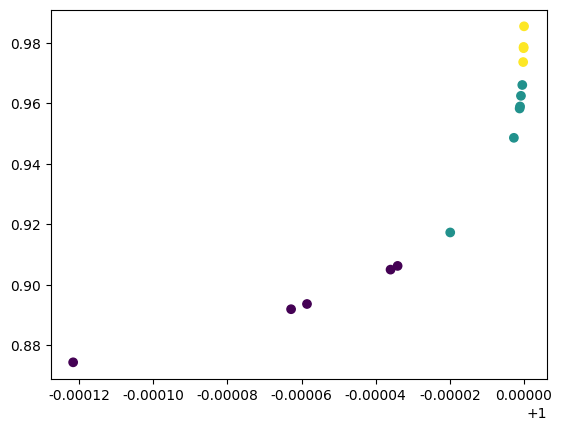

In [16]:
decoded_dataset=decoder.predict(encoded_dataset)
plt.scatter(decoded_dataset[:,2], decoded_dataset[:,3], c=y_test.astype('category').cat.codes)
plt.show()

## Orignal Data

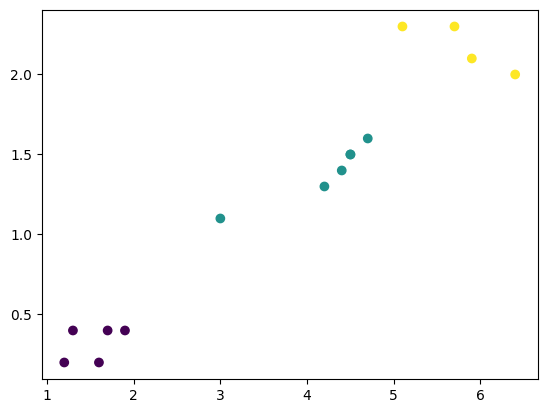

In [17]:
plt.scatter(x_test['Petal.Length'], x_test['Petal.Width'],c=y_test.astype('category').cat.codes)
plt.show()